In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data

df = pd.read_parquet('C:/Users/uzivatel/Desktop/projekty/data_jobs_python/data_jobs.parquet')

# A bit of cleaning up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Convert to a datetime datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert from 'str' to a list
df.sort_values(by='job_posted_date', inplace=True) # Sort the data by the date the job was added

In [35]:
df_skills_ww = df.copy()
df_skills_ww = df_skills_ww.explode('job_skills')
skills_count_ww = df_skills_ww.groupby(['job_skills', 'job_title_short']).size()
df_skills_count_ww = skills_count_ww.reset_index(name='skill_count')
df_skills_count_ww.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count_ww

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


# What are the primary skills required for the top 3 most popular data roles?

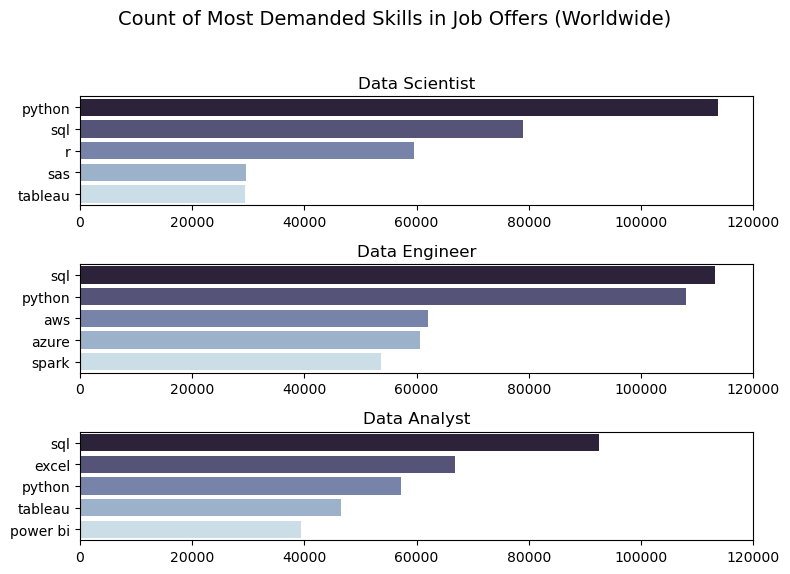

In [45]:
# Define the job titles to plot
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

# Create a figure with 3 subplots arranged vertically, adjusting the figure size
fig, ax = plt.subplots(3, 1, figsize=(8, 6))

# Loop through each job title to create a subplot
for i, job_title in enumerate(job_titles):
    # Filter the data for the current job title and select the top 5 skills
    df_plot_ww = df_skills_count_ww[df_skills_count_ww['job_title_short'] == job_title].head(5)
    
    # Plot a horizontal bar chart for the current job title
    sns.barplot(data=df_plot_ww, x='skill_count', y='job_skills', ax=ax[i], palette='ch:s=.25,rot=-.25_r')
    ax[i].set_title(job_title)
    
    # Customize the subplot: remove x-axis and y-axis label and set x-axis limit
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 120000)

fig.suptitle('Count of Most Demanded Skills in Job Offers (Worldwide)', fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Compare worldwide results with results in Central Europe 

In [38]:
# Define a list of job roles to filter for
roles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Define a list of countries to filter for
countries = ['Czechia', 'Poland', 'Germany', 'Austria', 'Slovakia']

# Filter the DataFrame to include only rows where the job title is in the specified roles and the job country is in the specified countries
df_eur_jobs = df[(df['job_country'].isin(countries)) & (df['job_title_short'].isin(roles))]

In [39]:
df_skills = df_eur_jobs.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
382,python,Data Engineer,7473
477,sql,Data Engineer,7247
383,python,Data Scientist,6499
476,sql,Data Analyst,6025
37,azure,Data Engineer,4363
...,...,...,...
68,clickup,Data Analyst,1
266,mattermost,Data Analyst,1
64,centos,Data Scientist,1
273,mlpack,Data Engineer,1


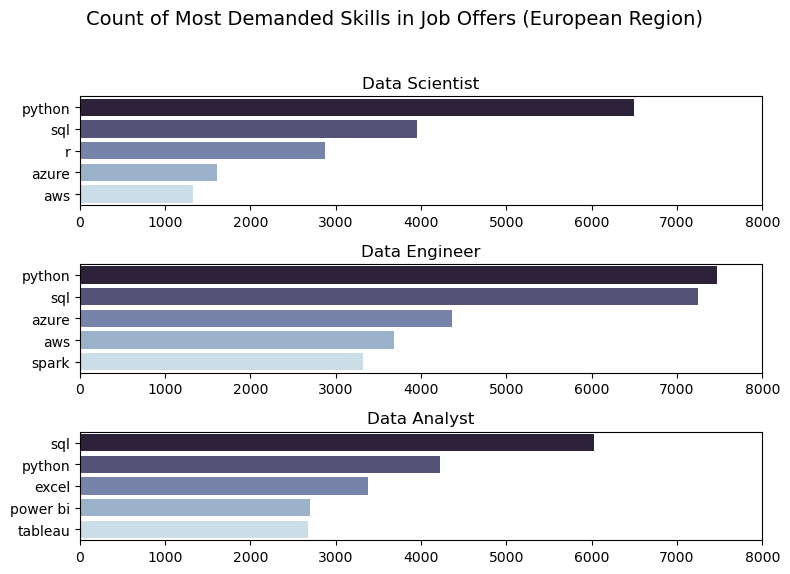

In [52]:
# Define the job titles to plot
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

# Create a figure with 3 subplots arranged vertically, adjusting the figure size
fig, ax = plt.subplots(3, 1, figsize=(8, 6))

# Loop through each job title to create a subplot
for i, job_title in enumerate(job_titles):
    # Filter the data for the current job title and select the top 5 skills
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    
    # Plot a horizontal bar chart for the current job title
    #df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], palette='ch:s=.25,rot=-.25_r')
    ax[i].set_title(job_title)
    
    # Customize the subplot: invert y-axis, remove y-axis label, hide legend, and set x-axis limit
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 8000)

fig.suptitle('Count of Most Demanded Skills in Job Offers (European Region)', fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

As we can see from the charts, the top 3 most common data positions, i.e. data scientist, data engineer and data analyst, the first 5 most in-demand skills are very similar worldwide and in Central Europe. In particular, SQL and Python are dominant for all three positions. Most of the skills are then already in very similar demand and the difference is at most in the ranking, i.e. in the number of jobs that require the skill. The difference is in the data scientist role offers, where SAS and Tableau are in demand worldwide, while cloud solutions such as Azure or AWS are more in demand in the Central Europe region.